## Importing Required Libraries

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [3]:
data1 = pd.read_csv('https://drive.google.com/uc?id=1PlthyuYpvBmZAZYQlgSulBZ5pmFi_aLb')
data2 = pd.read_csv('https://drive.google.com/uc?id=1tQlZjRsot3L_nMl1Nac0pH7Bb52iDVf2')
data3 = pd.read_csv('https://drive.google.com/uc?id=1BCUd0m2OaBgkg_J54zMDKtTRTk7dryVa')
data4 = pd.read_csv('https://drive.google.com/uc?id=1vjRq1DdnF2YQlt7mv2CxnZCazZFeLmNf')
data5 = pd.read_csv('https://drive.google.com/uc?id=1fEq3DHzZ_rY48sKEFHcEFbvNsX-gnYwM')

## Merging Data

In [4]:
data = pd.concat([data5, data1, data2, data3, data4])
data.head(2)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,21-05-19 8:29,21-05-19 9:29,34.8089,-82.2692,34.8089,-82.2692,0,Accident on Tanner Rd at Pennbrooke Ln.,439,...,False,False,False,False,False,False,Day,Day,Day,Day
1,2,07-10-19 17:43,07-10-19 19:42,35.0901,-80.7456,35.0901,-80.7456,0,Accident on Houston Branch Rd at Providence Br...,3299,...,False,False,False,False,False,False,Day,Day,Day,Day


## Exploaratory Data Analysis | Data Visualization

#### Working with Data & Time features

In [5]:
data[['start_date', 'start_time']] = data['Start_Time'].str.split(' ', expand=True)
data[['end_date', 'end_time']] = data['End_Time'].str.split(' ', expand=True)

data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')
data['start_time'] = pd.to_datetime(data['start_time'], errors='coerce')
data['end_date'] = pd.to_datetime(data['end_date'], errors='coerce')
data['end_time'] = pd.to_datetime(data['end_time'], errors='coerce')

data['time_diff'] = data['end_date'] - data['start_date']
data.head(2)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_date,start_time,end_date,end_time,time_diff
0,2,21-05-19 8:29,21-05-19 9:29,34.8089,-82.2692,34.8089,-82.2692,0,Accident on Tanner Rd at Pennbrooke Ln.,439,...,False,Day,Day,Day,Day,2019-05-21,2021-12-23 08:29:00,2019-05-21,2021-12-23 09:29:00,0 days
1,2,07-10-19 17:43,07-10-19 19:42,35.0901,-80.7456,35.0901,-80.7456,0,Accident on Houston Branch Rd at Providence Br...,3299,...,False,Day,Day,Day,Day,2019-07-10,2021-12-23 17:43:00,2019-07-10,2021-12-23 19:42:00,0 days


#### Filtering some data

In [6]:
data = data[data['time_diff'] == '0 days']

#### Visualizing some features

Accident Counts of top 10 Cities


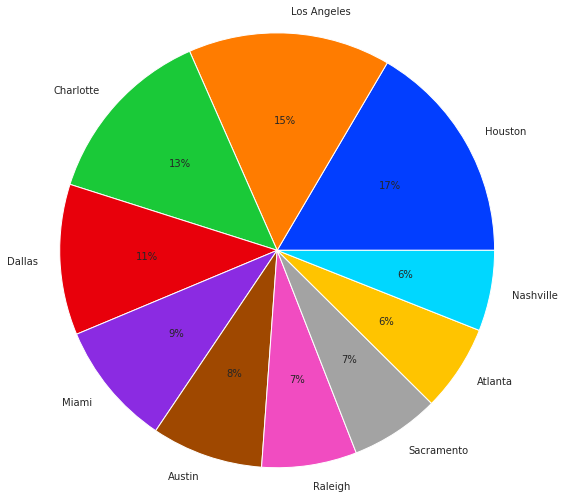

In [7]:
city = pd.DataFrame(data['City'].value_counts()[0:10])

colors = sns.color_palette('bright')[0:10]
plt.pie(city.City, labels=city.index, colors=colors, autopct='%.0f%%', radius=2.5)
print('Accident Counts of top 10 Cities')
plt.show()

## Major Accident cases are in Houstan and Los Angeles

In [8]:
data['start_time'] = data['start_time'].apply(lambda x: str(x).split(' ')[-1])
data['start_time'] = data['start_time'].apply(lambda x: x.split(':')[0])
data['start_time'] = data['start_time'].astype('int32')

data['time'] = pd.cut(x=data['start_time'], bins=[-1, 4, 8, 12, 16, 20, 24],
                            labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'])

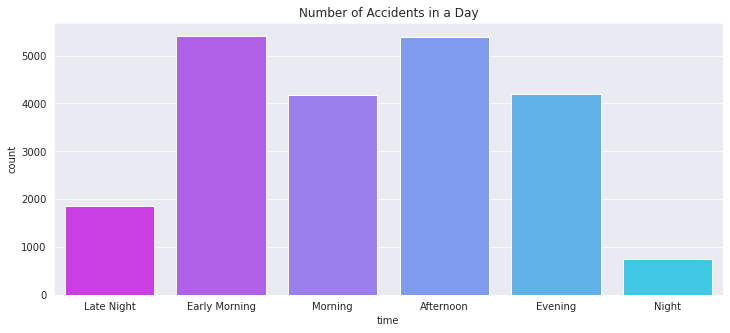

In [9]:
plt.figure(figsize=(12, 5))
sns.countplot(data['time'], order=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'], palette='cool_r')
plt.title('Number of Accidents in a Day')
plt.show()

## Accidents happens in early mornings the most i.e. between 4am to 8am

In [10]:
data['Year'] = data['Start_Time'].apply(lambda x: str(x).split(' ')[0])
data['Year'] = data['Year'].apply(lambda x: x.split('-')[-1])
data['Year'] = data['Year'].astype('int32')

In [11]:
data['Year'].unique()

array([19, 20, 18, 16, 17], dtype=int32)

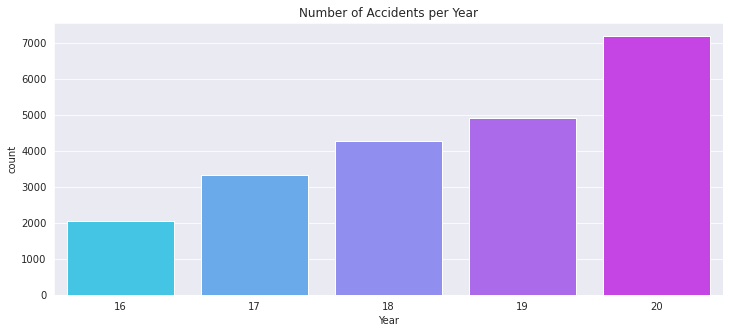

In [12]:
plt.figure(figsize=(12, 5))
sns.countplot(data['Year'], order=[16, 17, 18, 19,20], palette='cool')
plt.title('Number of Accidents per Year')
plt.show()

## Accidents are increasing at a Rapid Rate each Year.

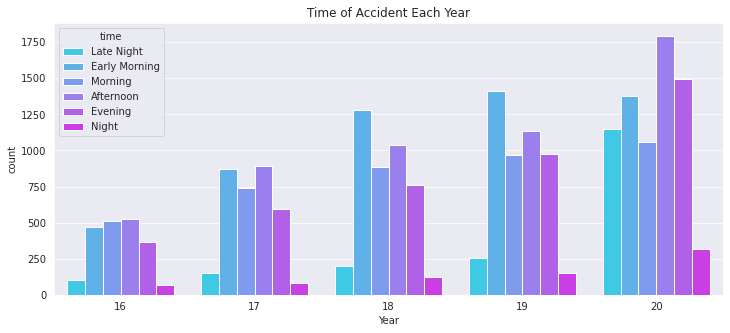

In [13]:
plt.figure(figsize=(12, 5))
sns.countplot(data['Year'], order=[16, 17, 18, 19,20], hue=data['time'], palette='cool')
plt.title('Time of Accident Each Year')
plt.show()

## In 2020, there is sudden **Increment** in **Late Night** accidents.

In [14]:
data['Visibility(mi)'].isnull().sum()
data['Visibility(mi)'].fillna('10', inplace=True)

In [15]:
data['Visibility(mi)'] = data['Visibility(mi)'].astype('float64')
data['Visibility(mi)'] = data['Visibility(mi)'].apply(lambda x:round(x))
data['Visibility(mi)'] = data['Visibility(mi)'].astype('int32')
data['Visibility(mi)'].unique()

array([10,  2,  5,  9,  7,  4,  8,  1,  6,  0,  3, 12, 30, 20, 40, 13, 50,
       15, 80, 75, 45, 70, 60, 25, 11, 35], dtype=int32)

In [16]:
data['Visibility(mi)'] = pd.cut(x=data['Visibility(mi)'], 
                                bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80],
                                labels=[10, 20, 30, 40, 50, 60, 70, 80])
data['Visibility(mi)'] = data['Visibility(mi)'].astype('int32')

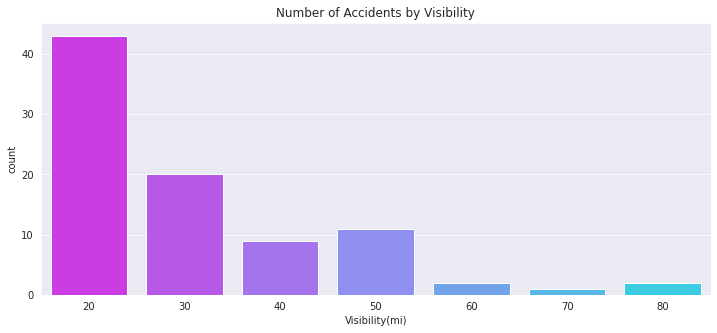

In [17]:
plt.figure(figsize=(12, 5))
sns.countplot(data[data['Visibility(mi)'] != 10]['Visibility(mi)'], palette='cool_r')
plt.title('Number of Accidents by Visibility')
plt.show()

## Most accidents happen when Visibility is around 20.

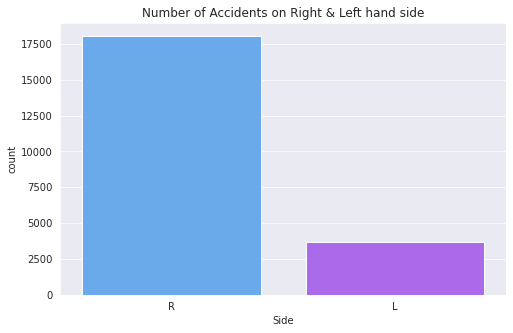

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data['Side'], palette='cool')
plt.title('Number of Accidents on Right & Left hand side')
plt.show()

## Most of the accidents happen on Right hand side.

In [19]:
data['Traffic_Signal'] = data['Traffic_Signal'].apply(lambda x:True if (x=='True' or x=='TRUE') else False)
data['No_Exit'] = data['No_Exit'].apply(lambda x:True if (x=='True' or x=='TRUE') else False)

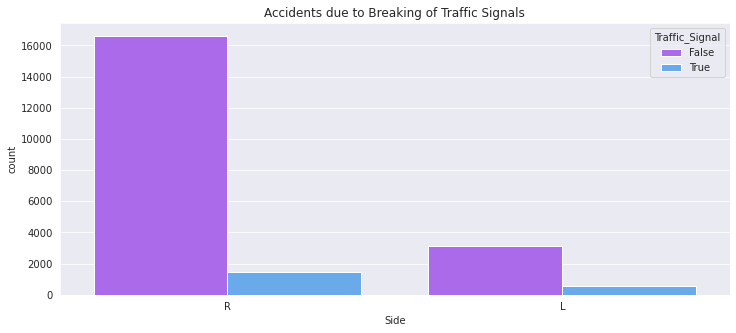

In [20]:
plt.figure(figsize=(12, 5))
sns.countplot(data['Side'], hue=data['Traffic_Signal'], palette='cool_r')
plt.title('Accidents due to Breaking of Traffic Signals')
plt.show()

## As expected, approximately 90% of accidents happen when people do not follow Traffic Signals.